
# Project: No Show Appointments - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This project developed for Udacity Data Analyst Nanodegree.
The project was about analyzing a specific dataset using the Python libraries NumPy, pandas, and Matplotlib, and then communicating findings about it as it will be shown in this paper.
The dataset which I analyzed is (No-show appointments) from Kaggle, 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. You can know more details from Kaggle.
 


### Question(s) for Analysis
>Can we predict if a patient will show up for his scheduled appointment or not?

>If yes, what are the characteristics correlated with showing up for scheduled appointment?


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> Start by reading my dataset "csv file" and explore it

In [5]:
df = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.shape

(110527, 14)

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


### Data Cleaning
> Removing unnecessary columns and unlogic values, found some of them in ‘Handcap’ and ‘Age’ as outliers

In [11]:
#Remove Handcap values except 0 or 1 as it this variable indicates if the patient has handcap or not
Handcap_outliers = df[ df['Handcap'] > 1 ].index

In [12]:
df.drop(Handcap_outliers, inplace=True)

In [13]:
#Remove Age outliers above 102 and below 0
age_outliers = df[ (df['Age'] > 102) | (df['Age'] < 0)].index

In [14]:
df.drop(age_outliers, inplace=True)

In [15]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.103220e+05,1.103220e+05,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000
mean,1.475232e+14,5.675297e+06,37.067221,0.098285,0.196833,0.071609,0.030384,0.018473,0.321187
std,2.561373e+14,7.129915e+04,23.092616,0.297701,0.397607,0.257840,0.171642,0.134655,0.466935
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174064e+12,5.640277e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.174698e+13,5.680566e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725509e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
#Removing‘PatientId’ and ‘AppointmentID’ as they not important in analysis.
df.drop(['PatientId' ,'AppointmentID'], axis = 1, inplace = True)

In [17]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
df.shape

(110322, 12)

>Dividing the main table into two tables to make analysis easier:

>showed: for patients who showed up their appointment.

>not_showed: for patients who didn’t showe up their appointment


In [19]:
showed = df[df['No-show']== 'No']

In [20]:
not_showed = df[df['No-show']== 'Yes']

In [21]:
showed.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,88047.000000,88047.000000,88047.000000,88047.000000,88047.000000,88047.000000,88047.000000
mean,37.775336,0.093882,0.204061,0.073574,0.030404,0.019024,0.291424
std,23.327717,0.291666,0.403016,0.261078,0.171698,0.136610,0.454421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
not_showed.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,22275.000000,22275.00000,22275.000000,22275.000000,22275.000000,22275.000000,22275.000000
mean,34.268238,0.11569,0.168260,0.063838,0.030303,0.016296,0.438833
std,21.916584,0.31986,0.374106,0.244470,0.171424,0.126615,0.496256
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,98.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

Are there any characteristics correlated with showing up for scheduled appointment?


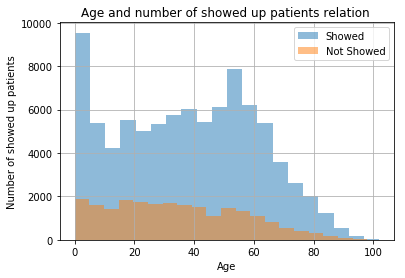

In [23]:
#Plotted the relation between age and number of showed up and not showed up the appointments from patients 
showed['Age'].hist(alpha=0.5, bins=20, label='Showed')
not_showed['Age'].hist(alpha=0.5, bins=20, label='Not Showed')
plt.legend();
plt.xlabel('Age');
plt.ylabel('Number of showed up patients') ;
plt.title("Age and number of showed up patients relation ");

This shows that children aged 0-5 years and adults aged 50-55 years have the most showing up appointment rate

In [24]:
def blue_pie_plot(labels, parameter):
    showed[parameter].value_counts().plot(labels=labels, startangle=330, autopct='%1.1f%%',kind="pie");
def red_pie_plot(labels, parameter):
    not_showed[parameter].value_counts().plot(colors = ['red', 'green'],labels=labels, startangle=330, autopct='%1.1f%%',kind="pie");

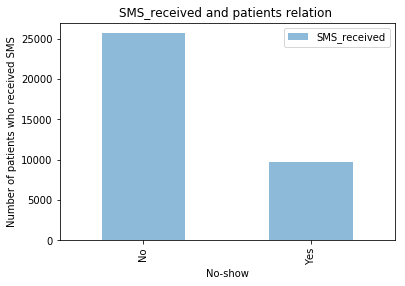

In [25]:
#Relation between showed up patients and SMS received 
df.groupby(['No-show'])[['SMS_received']].sum().plot(kind='bar',alpha=0.5);
df.groupby(['No-show'])[['SMS_received']].sum()
plt.xlabel('No-show');
plt.ylabel('Number of patients who received SMS') ;
plt.title("SMS_received and patients relation ");

This plot shows that there are a big number of showed up patients who have received SMS not like the opposite

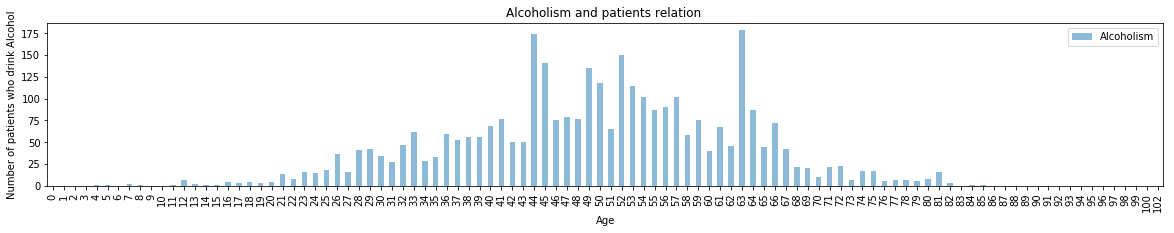

In [26]:
#Relation between the Age and Alcoholism features
df.groupby(['Age'])[['Alcoholism']].sum().plot(kind='bar',alpha=0.5,figsize=(20, 3));
plt.xlabel('Age');
plt.ylabel('Number of patients who drink Alcohol') ;
plt.title("Alcoholism and patients relation ");

Relation between the Age and Alcoholism features shows that patients who drink Alcohol increses between ages 44-64 years old

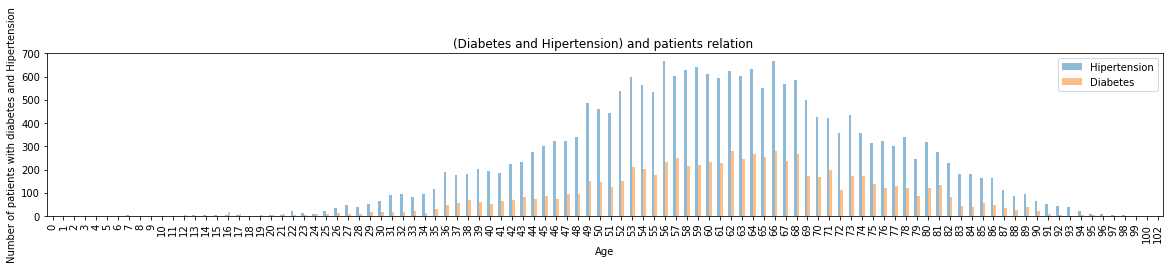

In [27]:
#Relation between the Age and (Hipertension and Diabetes) features
df.groupby(['Age'])[['Hipertension', 'Diabetes']].sum().plot(kind='bar',alpha=0.5,figsize=(20, 3));
plt.xlabel('Age');
plt.ylabel('Number of patients with diabetes and Hipertension') ;
plt.title("(Diabetes and Hipertension) and patients relation ");

Relation between the Age and (Hipertension and Diabetes) features shows that(Hipertension and Diabetes) are as high as possible between age 50 - 70 years old

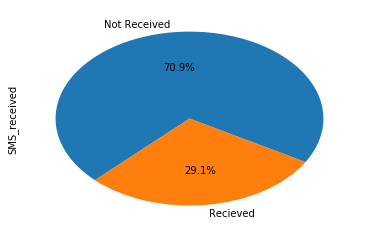

In [28]:
#Explores SMS_received variable in relation to'No of show'.
labels = ['Not Received', 'Recieved']
blue_pie_plot(labels, 'SMS_received')

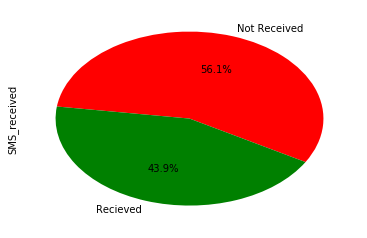

In [29]:
#Explores SMS_received variable in relation to 'No of not shows'.
labels = ['Not Received', 'Recieved']
red_pie_plot(labels, 'SMS_received')

Altogether, number of not received SMS is less than received.

For the patients who didn’t show up their appointment the percentage of SMS received is higher than that for patients who showed up their appointment

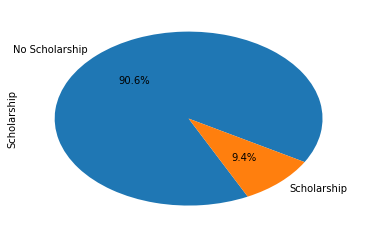

In [30]:
#Explores Scholarship variable in relation to'No of show'.
labels = ['No Scholarship', 'Scholarship']
blue_pie_plot(labels, 'Scholarship')

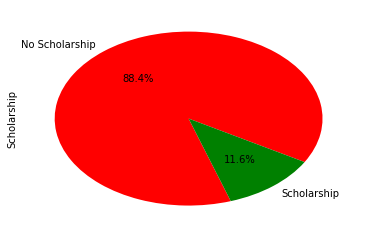

In [31]:
#Explores Scholarship variable in relation to 'No of not shows'.
labels = ['No Scholarship', 'Scholarship']
red_pie_plot(labels, 'Scholarship')

Altogether, number of patients who have Scholarship is less than haven't.

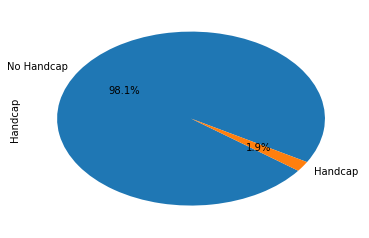

In [32]:
#Explores Handcap variable in relation to'No of show'.
labels = ['No Handcap', 'Handcap']
blue_pie_plot(labels, 'Handcap')

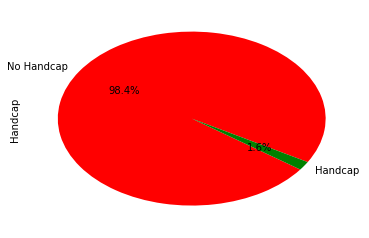

In [33]:
#Explores Handcap variable in relation to 'No of not shows'.
labels = ['No Handcap', 'Handcap']
red_pie_plot(labels, 'Handcap')

Altogether, number of patients who have Handcap is less than haven't.

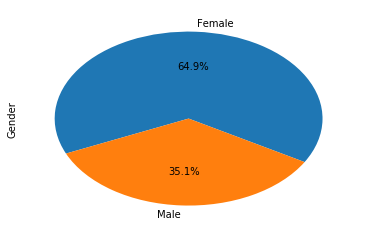

In [34]:
#Explores Gender variable in relation to'No of show'.
labels = ['Female', 'Male']
blue_pie_plot(labels, 'Gender')

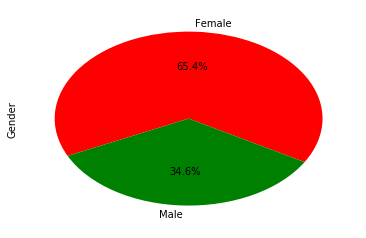

In [35]:
#Explores Gender variable in relation to 'No of not shows'.
labels = ['Female', 'Male']
red_pie_plot(labels, 'Gender')

Altogether, number of male patients is less females.

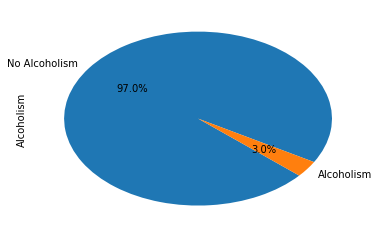

In [36]:
#Explores Alcoholism variable in relation to'No of show'.
labels = ['No Alcoholism', 'Alcoholism']
blue_pie_plot(labels, 'Alcoholism')

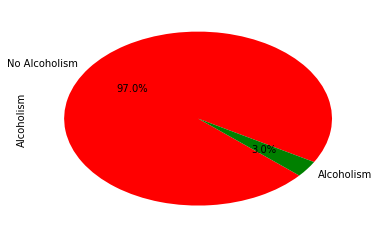

In [37]:
#Explores Alcoholism variable in relation to 'No of not shows'.
labels = ['No Alcoholism', 'Alcoholism']
red_pie_plot(labels, 'Alcoholism')

Altogether, number of patients who drink alcohol is less than don't.

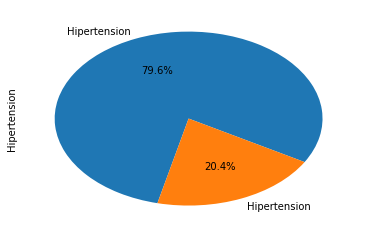

In [38]:
#Explores Hipertension variable in relation to'No of show'.
labels = ['Hipertension', 'Hipertension']
blue_pie_plot(labels,'Hipertension')

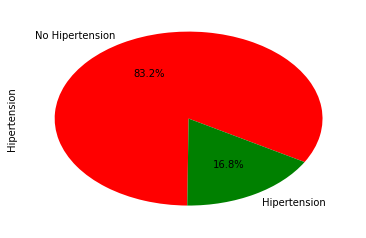

In [39]:
#Explores Hipertension variable in relation to 'No of not shows'.
labels = ['No Hipertension', 'Hipertension']
red_pie_plot(labels, 'Hipertension')

Altogether, number of patients who have Hipertension is less than haven't.

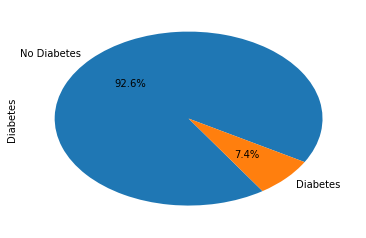

In [40]:
#Explores Diabetes variable in relation to'No of show'.
labels = ['No Diabetes', 'Diabetes']
blue_pie_plot(labels, 'Diabetes')

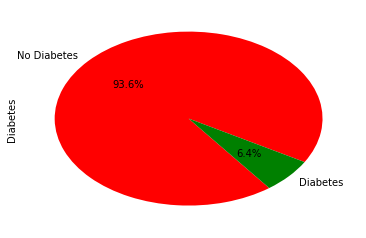

In [41]:
#Explores Diabetes variable in relation to 'No of not shows'.
labels = ['No Diabetes', 'Diabetes']
red_pie_plot(labels, 'Diabetes')

Altogether, number of patients who have Diabetes is less than haven't.

Altogether, the ratio between the percentage of above characteristics in patients who showed up their appointment and who did not approximately the same or very close to each other.

<a id='conclusions'></a>
## Conclusions

>Altogether, number of patients who showed up their appointment are much higher than patients who didn’t show up their appointment.

>Relation between the Age and Alcoholism features shows that patients who drink Alcohol increses between ages 44-64 years old

>Relation between the Age and (Hipertension and Diabetes) features shows that(Hipertension and Diabetes) are as high as possible between age 50 - 70 years old

>‘Age’ and ‘SMS_received’ are the most characteristics affecting the appointments showing up.

>For ‘Age’, children aged 0-5 years and adults aged 50-55 years have the most showing up appointment rate. So, we can predict that patients at this age are more likely to show up their appointments.

>For ‘SMS_received’, for the patients who didn’t show up their appointment the percentage of SMS received is higher than that for patients who showed up their appointment, this means that not receiving SMS is better than receiving it as receiving SMS makes the probability of not showing up the appointments higher, and this was a bit strange info, and I think we shouldn’t make prediction based on this parameter as this parameter does not classify and predict the behavior precisely due to the closeness of the ratio.

>Altogether, the ratio between the percentage of most of characteristics in patients who showed up their appointment and who did not approximately the same or very close to each other.

>Finally, we do not have a specific parameter able to determine if the patient will show up his appointment or not.

>Limitations: there are a couple of limitations in our data:

>First There were some wrong records in dataset like what i cleaned in Age, and Handcap Columns

>Second I think that the patient’s attendance for his appointment is more related to the culture related to education and the environment, most likely the prepayment for booking the appointment will be influential, likewise for the patient’s health condition, does he seriously need to visit the doctor or not, and these data were not present in this dataset.


In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0